<a href="https://colab.research.google.com/github/Imadeddine503/meshing_python/blob/main/circle_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is very logical to consider polar coordinates (r, θ), and adapt the rectangle meshing previously used for a polar use. That is the idea that is going to be developed here. Let us start with node coordinates:

In [50]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

# Parameters:

radius = 2
n_segments = 15
n_radial = 10


# Generate nodes
nodes = []
for i in range(n_radial):
    r = radius * i / (n_radial - 1)  # Radial distance
    for j in range(n_segments):
        theta = 2 * np.pi * j / n_segments  # Angular position
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        nodes.append((x, y))

nodes = np.array(nodes)

Now that the nodes are created, let us move on to the elements. It is to note that it is probable to create "empty" elements, i.e. flat or collapsed elements. We will remedy this problem later:

In [ ]:
# Generate elements (triangles)
elements = []
center_index = len(nodes) - 1  # The center node index
for i in range(n_radial - 1):  # For each radial level
    for j in range(n_segments):  # For each segment
        # Get current node indices
        current_node = i * n_segments + j
        next_node = i * n_segments + (j + 1) % n_segments
        next_radial_node = (i + 1) * n_segments + j
        next_radial_next_node = (i + 1) * n_segments + (j + 1) % n_segments

        # Create two triangles per sector
        elements.append([current_node, next_node, next_radial_node])
        elements.append([next_node, next_radial_next_node, next_radial_node])

elements = np.array(elements)


This time, before visualising the mesh, we will be calculating the elements areas and centres. The same formula used for determining mesh size used in the rectangle meshing is used here. Only thing that differs here is that the total area calculated here will be merely approximative. Itis however useful to do that, as it will help identify empty elements that will be filtered.

In [52]:
n_elements = np.shape(elements)[0]

# Creating empty elements
meshsize = np.zeros(n_elements)
meshcentre = np.zeros((n_elements,2))

for i in range(n_elements):
  ele = elements[i,:]
  xA, yA = nodes[ele[0]]
  xB, yB = nodes[ele[1]]
  xC, yC = nodes[ele[2]]

  S_ABC = abs((xB-xA)*(yC-yA)-(xC-xA)*(yB-yA))/2

  x_centre = (xA + xB + xC)/3
  y_centre = (yA + yB + yC)/3


  meshsize[i] = S_ABC
  meshcentre[i,0] = x_centre
  meshcentre[i,1] = y_centre

# Identifying empty elements:
non_empty = [index for index, value in enumerate(meshsize) if value > 0]


meshsize = meshsize[non_empty]
meshcentre = meshcentre[non_empty,:]
elements = elements[non_empty, :]

Now for some visualisation. We will also plot element size in the centre of the element:

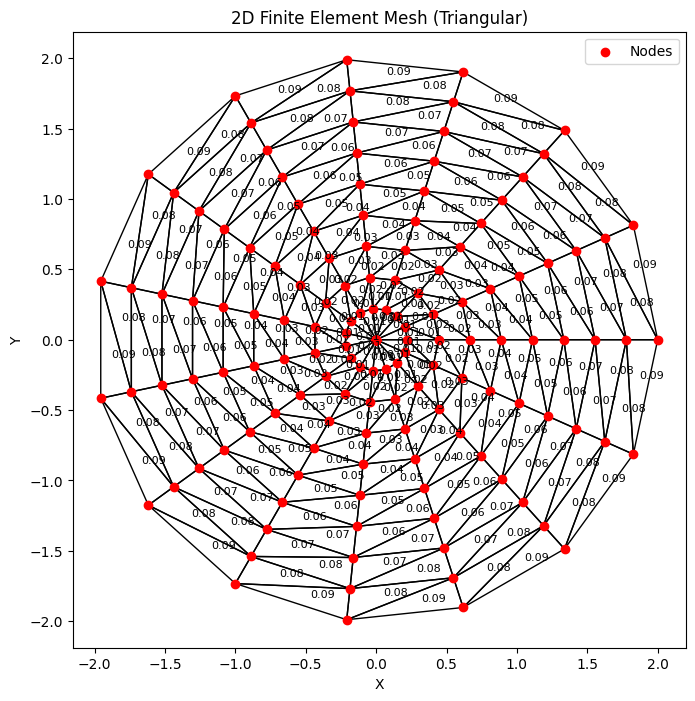

In [53]:
plt.figure(figsize=(8, 8))

# Plot the elements
for elem in elements:
    x_coords = nodes[elem, 0]
    y_coords = nodes[elem, 1]
    plt.fill(x_coords, y_coords, edgecolor='black', fill=False)

# Plot the nodes
plt.scatter(nodes[:, 0], nodes[:, 1], c='red', label="Nodes")

# Plot surfaces
for i in range(np.size(meshsize)):
  plt.text(meshcentre[i,0], meshcentre[i,1], str(int(100*meshsize[i])/100), fontsize = 8)

plt.title("2D Finite Element Mesh (Triangular)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

One final thing we can add disk surface calculation. We all know that it should be equal to 2πR, where R is the radius of the disk. It will certainly be interesting to see the impact of meshing size on the approximation of total surface, but that would be outof the scope of this project.

In [59]:
area = 2*pi*radius
approx_area = sum(meshsize)
print("Total area of disk:  " + str(int(1000*area)/1000))
print("\nApproximated total area of disk:  "+ str(int(1000*approx_area)/1000))
print("\nRelaive error:  "+ str(int(10000*(area-approx_area)/area)/100) + "%")

Total area of disk:  12.566

Approximated total area of disk:  12.202

Relaive error:  2.89%
